In [1]:
#Importing data wrangling library
import pandas as pd
import numpy as np
import os

#Importing visulization libraries
from matplotlib import pyplot as plt
import seaborn as sns


#Importing Machine Learning Libraries(Preprocessing)
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder # sklearn preprocessing for dealing with categorical variables


#Importing Machine Learning Libraries(Modelling And Evaluation) 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score




In [2]:
#reading in data

application_train = pd.read_csv('C:/Users/chara.geru/OneDrive - Avanade/DataScienceProject/HomeCreditModel/data/raw/application_train.csv')
df1 = pd.read_csv('C:/Users/chara.geru/OneDrive - Avanade/DataScienceProject/HomeCreditModel/data/interim/df1.csv')
df2 = pd.read_csv('C:/Users/chara.geru/OneDrive - Avanade/DataScienceProject/HomeCreditModel/data/interim/df2.csv')

Text(0.5, 0, 'Log_AMT_CREDIT')

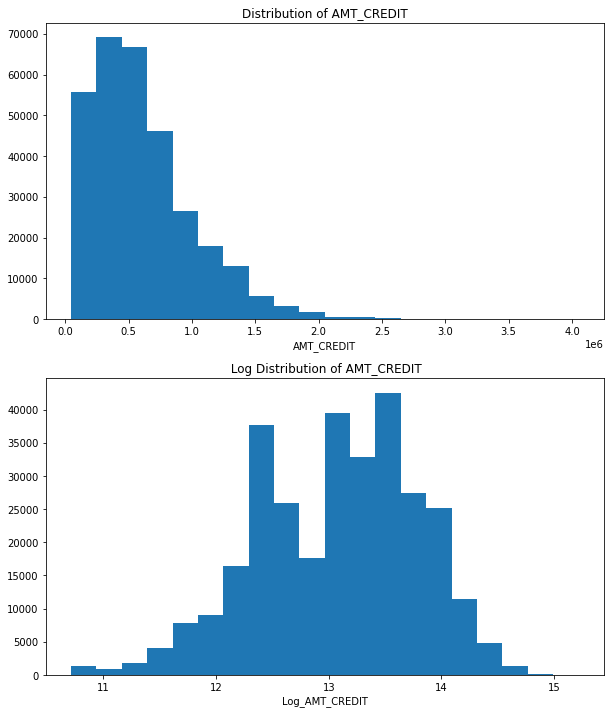

In [3]:
plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 1)


plt.title("Distribution of AMT_CREDIT")
plt.hist(df1["AMT_CREDIT"], bins =20)
plt.xlabel("AMT_CREDIT")


plt.subplot(2, 1, 2)


plt.title(" Log Distribution of AMT_CREDIT")

plt.hist(df2["AMT_CREDIT"], bins =20)
plt.xlabel("Log_AMT_CREDIT")


Text(0.5, 0, 'Log_INCOME_TOTAL')

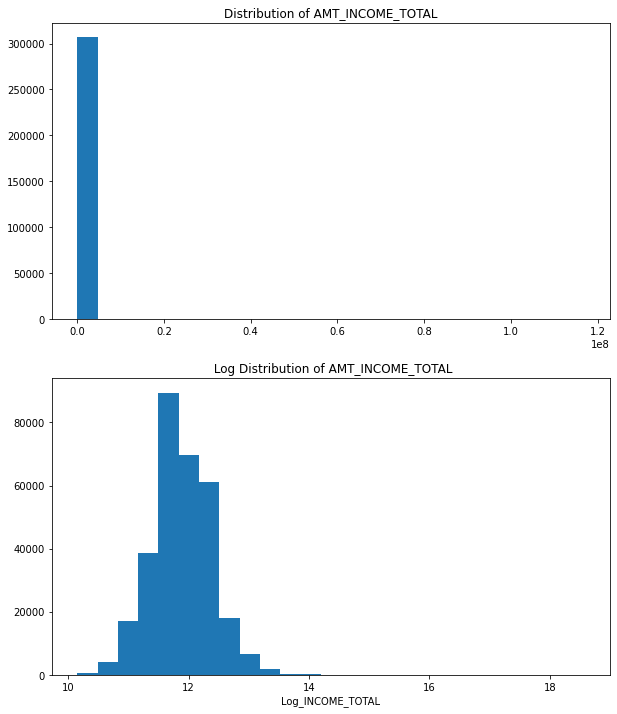

In [4]:
plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 1)
plt.title("Distribution of AMT_INCOME_TOTAL")
plt.hist(df1["AMT_INCOME_TOTAL"].dropna(), bins =25)


plt.subplot(2, 1, 2)
plt.title(" Log Distribution of AMT_INCOME_TOTAL")

plt.hist(df2["AMT_INCOME_TOTAL"].dropna(), bins =25)
plt.xlabel("Log_INCOME_TOTAL")

Text(0.5, 0, 'Log_GOODS_PRICE')

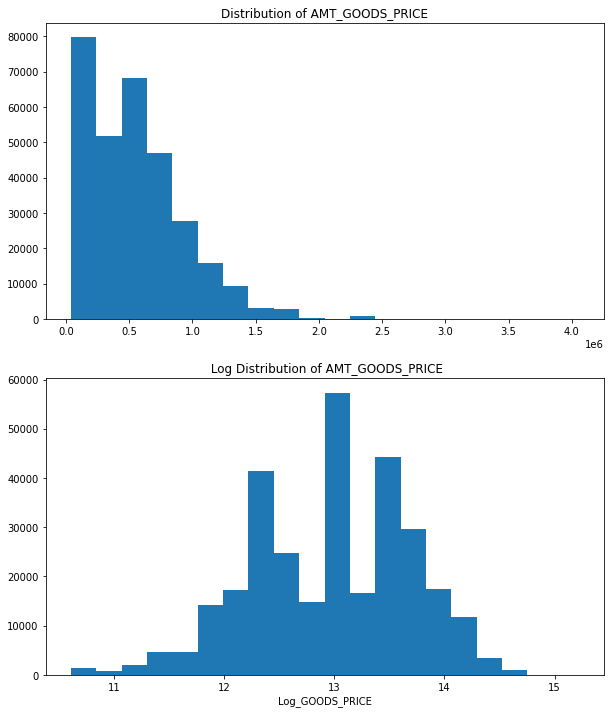

In [5]:
plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 1)
plt.title("Distribution of AMT_GOODS_PRICE")
plt.hist(df1["AMT_GOODS_PRICE"].dropna(), bins = 20)


plt.subplot(2, 1, 2)
plt.title(" Log Distribution of AMT_GOODS_PRICE")

plt.hist(df2["AMT_GOODS_PRICE"].dropna(), bins = 20)
plt.xlabel("Log_GOODS_PRICE")

In [ ]:
less_days = df1[df1.DAYS_EMPLOYED <= 50000]
more_days = df1[df1.DAYS_EMPLOYED >50000 ]


In [ ]:
s =less_days.DAYS_EMPLOYED
counts = s.value_counts()
less_percent100 = s.value_counts(normalize = True).mul(100).round(1)
less_percent100


In [ ]:
s1 =more_days.DAYS_EMPLOYED
counts = s1.value_counts()
more_percent100 = s1.value_counts(normalize = True).mul(100).round(1)
more_percent100


In [ ]:
plt.figure(figsize = (12, 14))

plt.subplot(2, 1, 1)
less_days['DAYS_EMPLOYED'].plot.hist(title = 'Less Days Employment Histogram');

plt.subplot(2, 1, 2)
more_days['DAYS_EMPLOYED'].plot.hist(title = 'More Days Employment Histogram');

plt.xlabel('Days Employment');

# plot distribution of both buckets
# default in both buckets- value and % of defaults
#stacked bar chart

In [ ]:
anom = application_train[application_train['DAYS_EMPLOYED'] == 365243]
non_anom = application_train[application_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))


In [ ]:
# Create an anomalous flag column
application_train['DAYS_EMPLOYED_ANOM'] = application_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

application_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employed');
plt.xlabel('Days Employed');

In [ ]:
# Create an anomalous flag column
app_test['DAYS_EMPLOYED_ANOM'] = application_test["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
#application_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

#print('There are %d anomalies in the test data out of %d entries' % (application_test["DAYS_EMPLOYED_ANOM"].sum(), len(application_test)))

In [ ]:
# Find correlations with the target and sort
correlations = application_train.corr()['TARGET'].sort_values()

# Display correlations
print('\nMost Positive Correlations: \n ', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

In [ ]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(application_train['TARGET'])

In [ ]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(application_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');


In [ ]:

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [ ]:
age_data = application_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

In [ ]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

In [ ]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');


In [ ]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

In [ ]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

In [ ]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

#DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age.
#so try build model with EXT_SOURCE_1 and/or DAYS_BIRTH

In [ ]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    #
    plt.subplot(3, 1, i+1)
    # plot repaid loans
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [ ]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

In [ ]:
# Make a new dataframe for polynomial features
poly_features = application_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = application_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)